**классификатор kNN**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

---

In [2]:
n = 150
data = [ np.random.rand(n,2)+[0,0.0], np.random.rand(n,2)+[0,0.6] ]

---

In [3]:
def comp_prof(d):
    X = np.vstack(d)
    y = np.asarray( [0]*len(d[0])+[1]*len(d[1]) )
    r = euclidean_distances(X) # матрица расстояний (Евклидова метрика)
    ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
    nc = y[ ri.flatten() ].reshape(r.shape) # номера классов для соседей в порядке увеличения расстояния 

    # инвертируем метку класса 1 для подсчёта точек-соседей из чужих классов
    nc = np.vstack([ (nc[ nc[:,0]==1 ]-1)*-1, nc[ nc[:,0]==0 ] ])
    # считаем чужих соседей k-тых в очереди удаления от объекта
    pc = np.asarray([ nc[:,k].sum() for k in range(1,nc.shape[1]) ])

    return pc / pc.max()

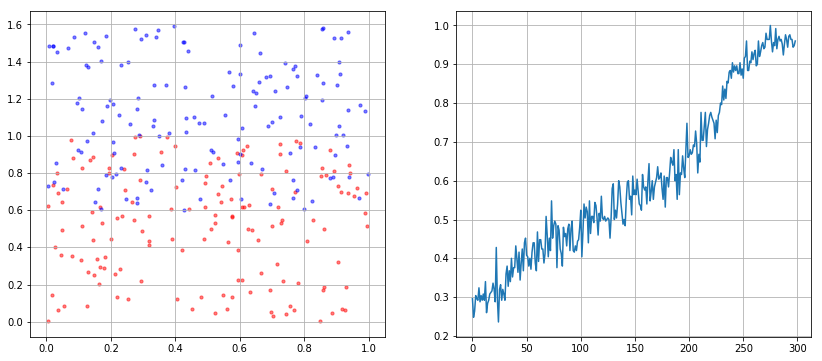

In [4]:
f, axarr = plt.subplots(1,2, sharey=False, sharex=False, figsize=(14,6),)

i=0
axarr[i].scatter( x=data[0][:,0], y=data[0][:,1], s=10, alpha=0.5, c='r' )
axarr[i].scatter( x=data[1][:,0], y=data[1][:,1], s=10, alpha=0.5, c='b' )
axarr[i].grid()

i+=1
pc = comp_prof(data)
axarr[i].plot( range(len(pc)) , pc ) 
axarr[i].grid()

plt.show()

---

In [5]:
X = np.vstack(data)
y = np.asarray( [0]*len(data[0]) + [1]*len(data[1]) )

In [6]:
nn = 5
u = np.random.rand(nn,2)+[0,0.2]

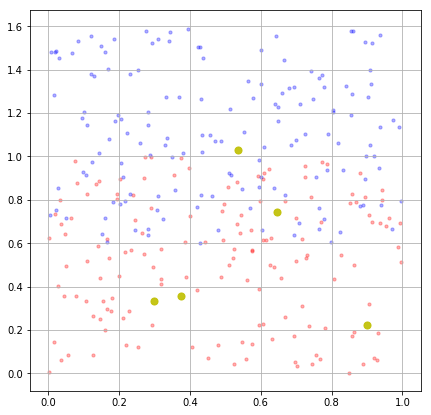

In [7]:
plt.figure(figsize=(7,7))
plt.scatter( x=data[0][:,0], y=data[0][:,1], s=10, alpha=0.3, c='r' )
plt.scatter( x=data[1][:,0], y=data[1][:,1], s=10, alpha=0.3, c='b' )
plt.scatter( x=u[:,0], y=u[:,1], s=50, alpha=0.9, c='y' )
plt.grid()
plt.show()

---

In [8]:
def kNN(u,X,k):
    r = euclidean_distances(u,X) # расстояния от точки до учебного набора
    ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
    nc = y[ ri.flatten() ].reshape(ri.shape) # номера классов для соседей в порядке увеличения расстояния 
    return (nc[:,:k].sum(axis=1) > k//2).astype(int)

In [9]:
ncc = kNN(u,X,k=7 ) 
ncc

array([0, 0, 0, 1, 1])

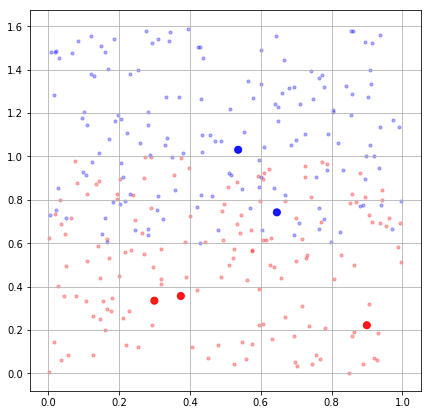

In [10]:
c = [ ['r','b'][i] for i in ncc ]

plt.figure(figsize=(7,7))
plt.scatter( x=data[0][:,0], y=data[0][:,1], s=10, alpha=0.3, c='r' )
plt.scatter( x=data[1][:,0], y=data[1][:,1], s=10, alpha=0.3, c='b' )
plt.scatter( x=u[:,0], y=u[:,1], s=50, alpha=0.9, c=c )
plt.grid()
plt.show()